# RasdaPy Query Workflow

* **Tutorial**: https://tutorial.rasdaman.org/rasdapy-tutorial/

### Initialize connection to **rasdaman Manager** (rasmgr)
The DBConnector maintains the connection to rasdaman. In order to connect it is necessary to specify the host (*default: localhost*) and port (*default: 7001*) on which rasmgr is running, as well as valid rasdaman username with read and write permissions (*default: rasadmin*) and password (*default: rasadmin*).

In [1]:
import sys
sys.path

['/home/arkaghosh/Downloads/rasdapy3_dir',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/arkaghosh/.local/lib/python3.8/site-packages',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages']

In [2]:
from platform import python_version

print(python_version())

3.8.10


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from rasdapy.db_connector import DBConnector
from rasdapy.query_executor import QueryExecutor

db_connector = DBConnector("localhost", 7001, "rasadmin", "rasadmin")
query_executor = QueryExecutor(db_connector)

db_connector.open()

In [5]:
print(query_executor.execute_read("select version()"))

b'rasdaman 10.1.3 on x86_64-linux-gnu, compiled by c++ (Ubuntu 9.3.0-10ubuntu2) 9.3.0'


In [6]:
collection_list = query_executor.execute_read("select c from RAS_COLLECTIONNAMES as c")
print(collection_list)

['AIR_TEMP_02', 'output1', 'AIR_TEMP_01', 'AIR_TEMP_03', 'AIR_TEMP_X']


In [7]:
dim = query_executor.execute_read("select sdom(c) from AIR_TEMP_X as c")         

In [8]:
print(dim)

[0:1379,0:359,0:719]


In [9]:
result = query_executor.execute_read("select m[50, 30:40 , 20:25] from AIR_TEMP_X as m")
numpy_array = result.to_array()
print(numpy_array.shape)
print(numpy_array)

(11, 6)
[[-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]
 [-9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36 -9.96921e+36
  -9.96921e+36]]


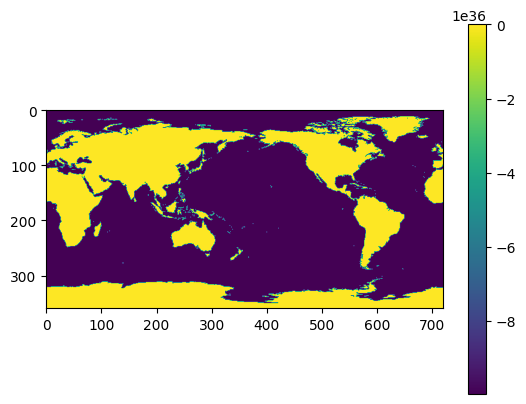

<class 'numpy.ndarray'>


In [10]:
import matplotlib.pyplot as plt
import numpy as np

result = query_executor.execute_read("select m[5, 0:*, 0:*] from AIR_TEMP_X as m")
numpy_array = result.to_array()

# Plot the grid
plt.imshow(numpy_array)
plt.colorbar()
plt.show()

print(type(numpy_array))

In [11]:
dbinfo = query_executor.execute_read('select dbinfo(c) from AIR_TEMP_X as c')
print(dbinfo)

{
 "oid": "3073",
 "baseType": "marray <float, [*:*,*:*,*:*]>",
 "setTypeName": "AIR_TEMP_X_Set",
 "mddTypeName": "AIR_TEMP_X_Array",
 "tileNo": "1382",
 "totalSize": "1430784000",
 "tiling": {
	"tilingScheme": "aligned",
	"tileSize": "4194304",
	"tileConfiguration": "[0:0,0:359,0:719]"
 },
 "index": {
	"type": "rpt_index",
	"PCTmax": "4096",
	"PCTmin": "2048"
 }
}


In [29]:
# import numpy as np
# import matplotlib as mpl
# import matplotlib.pylab as plt

# fig, ax = plt.subplots(1, 1, figsize=(12, 6))  # setup the plot

# x = np.random.rand(20)  # define the data
# y = np.random.rand(20)  # define the data
# tag = np.random.randint(0, 20, 20)
# tag[10:12] = 0  # make sure there are some 0 values to show up as grey

# cmap = plt.cm.jet  # define the colormap
# # extract all colors from the .jet map
# cmaplist = [cmap(i) for i in range(cmap.N)]
# # force the first color entry to be grey
# cmaplist[0] = (.5, .5, .5, 1.0)

# # create the new map
# cmap = mpl.colors.LinearSegmentedColormap.from_list(
#     'Custom cmap', cmaplist, cmap.N)

# # define the bins and normalize
# bounds = np.linspace(0, 20, 21)
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# # make the scatter
# scat = ax.scatter(x, y, c=tag, s=np.random.randint(100, 500, 20),
#                   cmap=cmap, norm=norm)

# # create a second axes for the colorbar
# ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
# cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
#     spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

# ax.set_title('Well defined discrete colors')
# ax2.set_ylabel('Very custom cbar [-]', size=12)

## Query 

In [27]:
query = "select m[50, 0:*, 0:4] from AIR_TEMP_X as m"

In [28]:
dim = query_executor.execute_read(query)  
print(dim)

b'\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x00\xf0\xfc\x00\x

In [29]:
db_connector.close()

In [37]:
query = "select c from AIR_TEMP_X as c where for c in (AIR_TEMP_X)return encode(clip(c,Multipolygon(((-23.189600 118.432617, -27.458321 117.421875, -30.020354 126.562500, -24.295789 125.244141)),((-27.380304 137.768555, -30.967012 147.700195,-25.491629 151.259766, -18.050561 142.075195)))), "image/png")"

SyntaxError: invalid syntax (1144647075.py, line 1)

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/arkaghosh/.local/lib/python3.8/site-packages/rasdapy/cores/utils.py", line 478, in run
    self._target(*self._args)
  File "/home/arkaghosh/.local/lib/python3.8/site-packages/rasdapy/cores/remote_procedures.py", line 73, in rasmgr_keep_alive
    return stub.KeepAlive(make_rasmgr_keep_alive_req(cuuid), _TIMEOUT_SECONDS)
  File "/home/arkaghosh/.local/lib/python3.8/site-packages/grpc/_channel.py", line 946, in __call__
    return _end_unary_response_blocking(state, call, False, None)
  File "/home/arkaghosh/.local/lib/python3.8/site-packages/grpc/_channel.py", line 849, in _end_unary_response_blocking
    raise _InactiveRpcError(state)
grpc._channel._InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNKNOWN
	details = "pThe client with client ID 3dcf1a53-2df3-49b5-9257-0d6c1427e514 does

In [16]:
import shapefile as sh
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [2]:
pip install pyshp

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 951.0 kB/s eta 0:00:00MB/s eta 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import shapefile as sh

In [2]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
  Using cached shapely-2.0.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.3 MB)
  Using cached pyproj-3.4.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Using cached Fiona-1.9.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.9 MB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import shapefile as sh
import geopandas as gpd

In [13]:
gdf = gpd.read_file('/home/arkaghosh/Downloads/rasdapy3_dir/Sweden_shapefile/se_1km.shp')
print (gdf)

             CELLCODE  EOFORIGIN  NOFORIGIN  \
0       1kmE4307N3904    4307000    3904000   
1       1kmE4307N3905    4307000    3905000   
2       1kmE4307N3906    4307000    3906000   
3       1kmE4307N3907    4307000    3907000   
4       1kmE4307N3908    4307000    3908000   
...               ...        ...        ...   
674377  1kmE4992N4766    4992000    4766000   
674378  1kmE4992N4767    4992000    4767000   
674379  1kmE4992N4768    4992000    4768000   
674380  1kmE4992N4769    4992000    4769000   
674381  1kmE4992N4770    4992000    4770000   

                                                 geometry  
0       POLYGON ((4307000.000 3904000.000, 4307000.000...  
1       POLYGON ((4307000.000 3905000.000, 4307000.000...  
2       POLYGON ((4307000.000 3906000.000, 4307000.000...  
3       POLYGON ((4307000.000 3907000.000, 4307000.000...  
4       POLYGON ((4307000.000 3908000.000, 4307000.000...  
...                                                   ...  
674377  POLYGON

<AxesSubplot: >

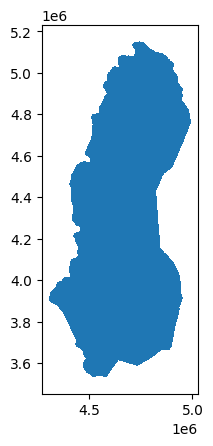

In [14]:
gdf.plot()

In [15]:
gdf

,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
0,1kmE4307N3904,4307000,3904000,"POLYGON ((4307000.000 3904000.000, 4307000.000..."
1,1kmE4307N3905,4307000,3905000,"POLYGON ((4307000.000 3905000.000, 4307000.000..."
2,1kmE4307N3906,4307000,3906000,"POLYGON ((4307000.000 3906000.000, 4307000.000..."
3,1kmE4307N3907,4307000,3907000,"POLYGON ((4307000.000 3907000.000, 4307000.000..."
4,1kmE4307N3908,4307000,3908000,"POLYGON ((4307000.000 3908000.000, 4307000.000..."
...,...,...,...,...
674377,1kmE4992N4766,4992000,4766000,"POLYGON ((4992000.000 4766000.000, 4992000.000..."
674378,1kmE4992N4767,4992000,4767000,"POLYGON ((4992000.000 4767000.000, 4992000.000..."
674379,1kmE4992N4768,4992000,4768000,"POLYGON ((4992000.000 4768000.000, 4992000.000..."
674380,1kmE4992N4769,4992000,4769000,"POLYGON ((4992000.000 4769000.000, 4992000.000..."


In [16]:
gdf.boundary

0         LINESTRING (4307000.000 3904000.000, 4307000.0...
1         LINESTRING (4307000.000 3905000.000, 4307000.0...
2         LINESTRING (4307000.000 3906000.000, 4307000.0...
3         LINESTRING (4307000.000 3907000.000, 4307000.0...
4         LINESTRING (4307000.000 3908000.000, 4307000.0...
                                ...                        
674377    LINESTRING (4992000.000 4766000.000, 4992000.0...
674378    LINESTRING (4992000.000 4767000.000, 4992000.0...
674379    LINESTRING (4992000.000 4768000.000, 4992000.0...
674380    LINESTRING (4992000.000 4769000.000, 4992000.0...
674381    LINESTRING (4992000.000 4770000.000, 4992000.0...
Length: 674382, dtype: geometry